In [2]:
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt

### Задача 1
Примените алгоритм Metropolis для генерации выборки из распределения с плотностью      
p(x) = 0.3N(-4, 2) + 0.7N(3, 6), где N(a, b) - плотность нормального распределения со средним a и дисперсией b. Для наглядности, ниже приведен график плотности смеси. Покажите, что гистограмма, построенная по выборке, приближает заданную плотность смеси.

In [2]:
def metroplis(start, value, proposal, niter, nburn=0, **kwargs):
    current = start
    post = [current]
    for i in range(niter):
        proposed = proposal(current, **kwargs)
        p = value(proposed, **kwargs) / value(current, **kwargs)
        if np.random.rand() < p:
            current = proposed
        post.append(current)
    return post[nburn:]


def value(x, **kwargs):
    _ = kwargs
    return 0.3*norm(-4, np.sqrt(2)).pdf(x) + 0.7*norm(3, np.sqrt(6)).pdf(x)
    
def proposal(current, sigma, **kwargs):
    _ = kwargs
    current = np.asarray(current)
    sigma = np.asarray(sigma)
    return current + sigma * np.random.randn(*current.shape)


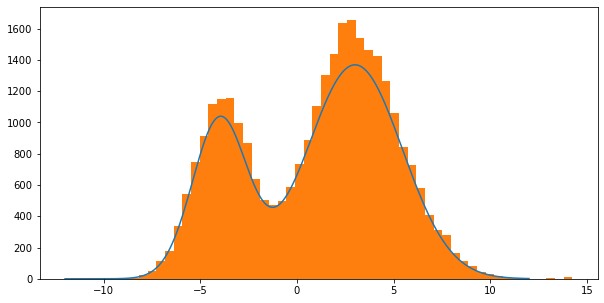

In [5]:
N = 30000

sample = metroplis(0, value, proposal, N, sigma=1)
x = np.linspace(-12, 12, 1000)
y = N / 2.5 * value(x)

fig, ax = plt.subplots(1, figsize=(10, 5))
fig.patch.set_facecolor('xkcd:white')
plt.plot(x, y)
plt.hist(sample, bins=52)
plt.show()

### Задача 2
Рассмотрим граф $G=(V,E)$, вершинам которого случайным образом приписаны значения 0 и 1 так, что смежные вершины не могут одновременно иметь значение 1. Пример допустимой расстановки значений по вершинам графа показан на картинке ниже (черные вершины имеют значение 1, белые - 0):

<!-- ![img](http://www.mathematik.uni-ulm.de/stochastik/lehre/ss06/markov/skript_engl/bild4.jpg) -->

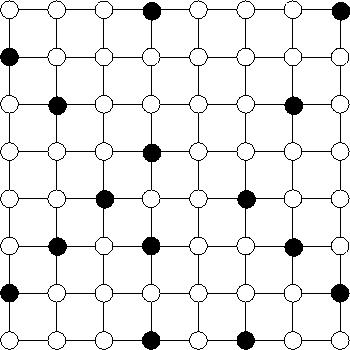


Явно перебирать все $x \in \{0,1\}^{V}$ не представляется возможным. Мы могли бы попробовать оценить ${\rm E} n(\xi)$, используя закон больших чиcел:
$$
{\rm E} n(\xi) \approx \frac{1}{N} \sum\limits_{i=1}^{N} n(\xi_i), \text{где $\xi_i$, $i=1,...,N$ - выборка случайных допустимых графов. }
$$

Для моделирования выборки можно применить метод MCMC:
1. выбираем случайную вершину
2. если в вершине можно заменить цвет - заменяем с вероятностью 0.5
3. добавляем граф в выборку
4. переходим на шаг 1

Задание
* Оценить  ${\rm E} n(\xi)$ для графа 10х10
* Построить график распределеиня $n(\xi)$

Матожидание = 23.60969


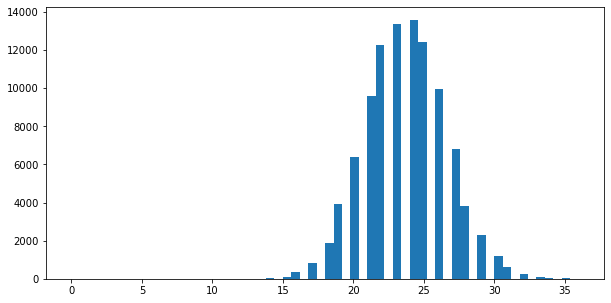

In [181]:
N = 10
M = 100000
ggraph = np.full((N+2) ** 2, 0).reshape(N+2,N+2)
def IsAllowed(graph, i, j):
    return (graph[i + 2, j + 1] == 0 and graph[i, j + 1] == 0 and 
            graph[i + 1, j + 2] == 0 and graph[i + 1, j] == 0)

def MCMC(graph, n, niter):
    res = []
    for _ in range(niter):
        i = int(np.floor(np.random.rand() * n))
        j = int(np.floor(np.random.rand() * n))
        if (graph[i + 1, j + 1] == 0 and IsAllowed(graph, i, j) and
            np.random.rand() < 0.5):
            graph[i + 1, j + 1] = 1
        elif (graph[i + 1, j + 1] == 1 and np.random.rand() < 0.5):
            graph[i + 1, j + 1] = 0
        res.append(graph.copy())
    return res

sample = np.array(MCMC(ggraph, N, M))
sample = np.array(list(map(np.sum,sample)))
print("Матожидание =", sample.mean())

fig, ax = plt.subplots(1, figsize=(10, 5))
fig.patch.set_facecolor('xkcd:white')
plt.hist(sample, bins=60)
plt.show()